<a href="https://colab.research.google.com/github/ManishRawat07/ML/blob/main/HPE/DL/CIFAR10_Image_Classification_using_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## CNN image classification

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from keras.models import Sequential, load_model
from keras.layers import Conv2D, Dense, Flatten, MaxPooling2D, Dropout, BatchNormalization


In [2]:
cifar10 = tf.keras.datasets.cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Print the shapes of the data
print("x_train shape:", x_train.shape)
print("y_train shape:", y_train.shape)
print("x_test shape:", x_test.shape)
print("y_test shape:", y_test.shape)
print("\n")

# Print some data points
print("First 5 labels in y_train:\n", y_train[:5])


x_train shape: (50000, 32, 32, 3)
y_train shape: (50000, 1)
x_test shape: (10000, 32, 32, 3)
y_test shape: (10000, 1)


First 5 labels in y_train:
 [[6]
 [9]
 [9]
 [4]
 [1]]


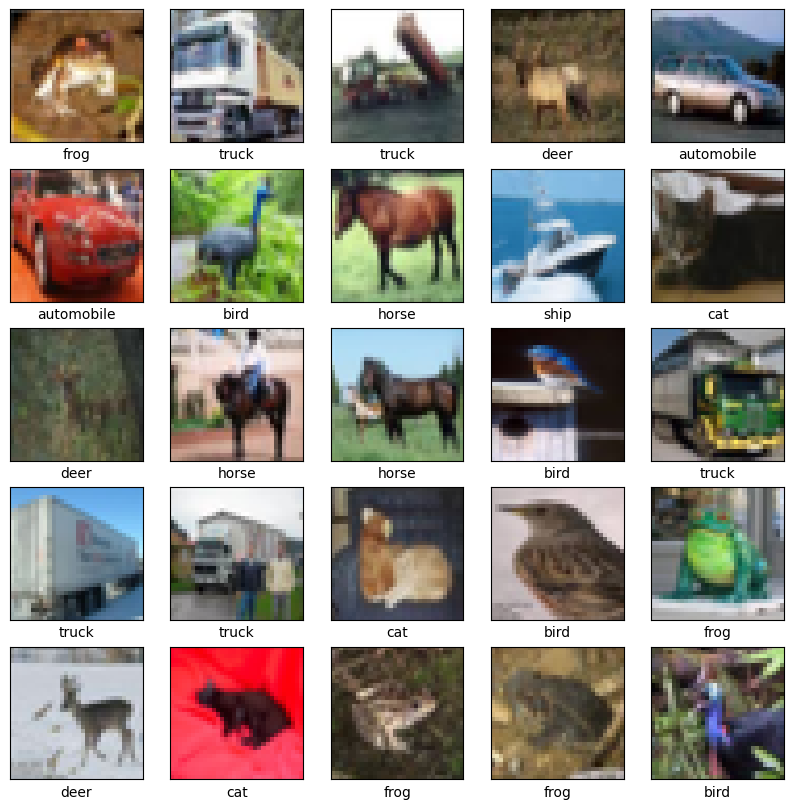

In [3]:
# Display some images
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
plt.figure(figsize=(10,10))

for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i])
    plt.xlabel(class_names[y_train[i][0]])
plt.show()

In [4]:
# Normalize pixel values to be between 0 and 1
x_train, x_test = x_train / 255.0, x_test / 255.0

# Convert labels to categorical one-hot encoding
y_train = tf.keras.utils.to_categorical(y_train, num_classes=10)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=10)

# Define the CNN model
model = Sequential()
model.add(Conv2D(filters=96, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(Conv2D(filters=96, kernel_size=(3,3), strides=2, activation='relu'))

# added dropout layer
model.add(Dropout(0.2))
model.add(Conv2D(filters=192, kernel_size=(3,3), activation='relu'))
model.add(Conv2D(filters=192, kernel_size=(3,3), strides=2, activation='relu'))

# added dropout layer
model.add(Dropout(0.5))
model.add(Flatten())
model.add(BatchNormalization())
model.add(Dense(256, activation='relu'))
model.add(Dense(10, activation="softmax"))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [5]:
# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(x_train, y_train, batch_size=32, epochs=10, validation_data=(x_test, y_test))

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 27s 13ms/step - accuracy: 0.3389 - loss: 1.8290 - val_accuracy: 0.4790 - val_loss: 1.4306
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 30s 9ms/step - accuracy: 0.5365 - loss: 1.3022 - val_accuracy: 0.5758 - val_loss: 1.1882
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 19s 8ms/step - accuracy: 0.6067 - loss: 1.1124 - val_accuracy: 0.6476 - val_loss: 1.0064
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 22s 9ms/step - accuracy: 0.6464 - loss: 0.9979 - val_accuracy: 0.6632 - val_loss: 0.9523
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 19s 8ms/step - accuracy: 0.6780 - loss: 0.9119 - val_accuracy: 0.7017 - val_loss: 0.8507
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 20s 8ms/step - accuracy: 0.6992 - loss: 0.8578 - val_accuracy: 0.6787 - val_loss: 0.9512
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.7171 - loss: 0.8139 - val_accuracy: 0.7303 - val_loss: 0.7724
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 21s 8ms/step - accuracy: 0.7227 - loss: 

In [6]:
# Evaluate the model
loss, accuracy = model.evaluate(x_test, y_test, verbose=0)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")

Test Loss: 0.7892
Test Accuracy: 0.7364


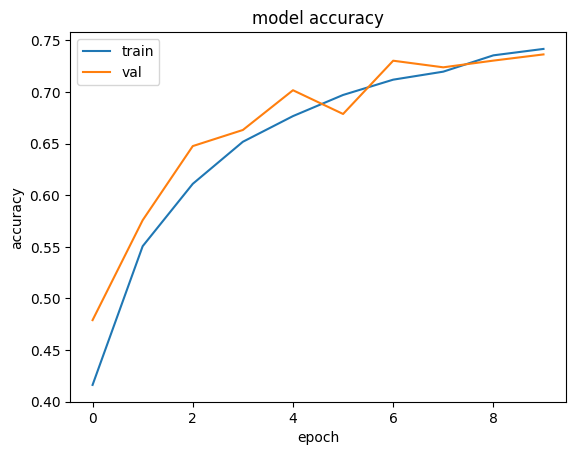

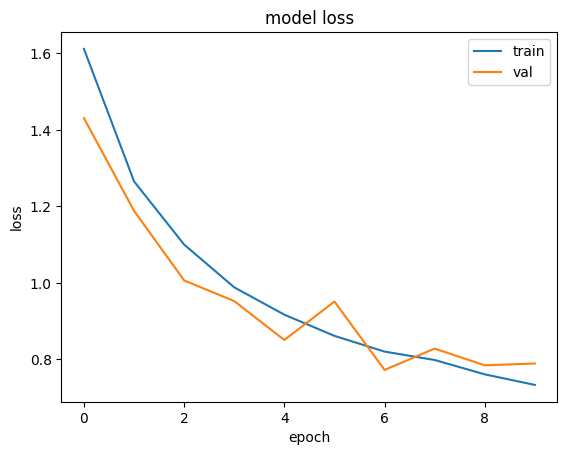

In [7]:
#  Ploting the accuracy graph
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='best')
plt.show()

# Ploting the loss graph
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='best')
plt.show()

In [9]:

# Improved Model with Data Augmentation and Regularization
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Data Augmentation
datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    )
datagen.fit(x_train)

# Define the CNN model with improvements
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3), padding='same')) #padding same
model.add(BatchNormalization()) # added BatchNormalization
model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu', padding='same')) #padding same
model.add(BatchNormalization()) # added BatchNormalization
model.add(MaxPooling2D(pool_size=(2, 2))) # added MaxPooling2D
model.add(Dropout(0.25))        # added dropout

model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding='same'))#padding same
model.add(BatchNormalization()) # added BatchNormalization
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding='same'))#padding same
model.add(BatchNormalization()) # added BatchNormalization
model.add(MaxPooling2D(pool_size=(2, 2))) # added MaxPooling2D
model.add(Dropout(0.25))        # added dropout

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(BatchNormalization()) # added BatchNormalization
model.add(Dropout(0.5))  # Increased dropout

model.add(Dense(10, activation='softmax'))

# Compile the model with a different optimizer and learning rate
from tensorflow.keras.optimizers import Adam

optimizer = Adam(learning_rate=0.0001) #Reduced Learning Rate
model.compile(optimizer=optimizer,
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model with data augmentation
epochs = 50  # Increased epochs
history = model.fit(datagen.flow(x_train, y_train, batch_size=64), #increased batch size
                    epochs=epochs,
                    validation_data=(x_test, y_test))

Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


782/782 ━━━━━━━━━━━━━━━━━━━━ 53s 57ms/step - accuracy: 0.2784 - loss: 2.5561 - val_accuracy: 0.5192 - val_loss: 1.3982
Epoch 2/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 69s 47ms/step - accuracy: 0.4220 - loss: 1.7886 - val_accuracy: 0.4982 - val_loss: 1.6198
Epoch 3/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 41s 47ms/step - accuracy: 0.4783 - loss: 1.5606 - val_accuracy: 0.5561 - val_loss: 1.3143
Epoch 4/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 38s 48ms/step - accuracy: 0.5193 - loss: 1.4106 - val_accuracy: 0.5919 - val_loss: 1.2417
Epoch 5/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 37s 47ms/step - accuracy: 0.5502 - loss: 1.2973 - val_accuracy: 0.6001 - val_loss: 1.2138
Epoch 6/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 37s 47ms/step - accuracy: 0.5766 - loss: 1.2158 - val_accuracy: 0.5796 - val_loss: 1.2720
Epoch 7/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 41s 47ms/step - accuracy: 0.5976 - loss: 1.1424 - val_accuracy: 0.5929 - val_loss: 1.2306
Epoch 8/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 36s 46ms/step - accuracy: 0.6129 - loss: 1.1047 - val_accurac

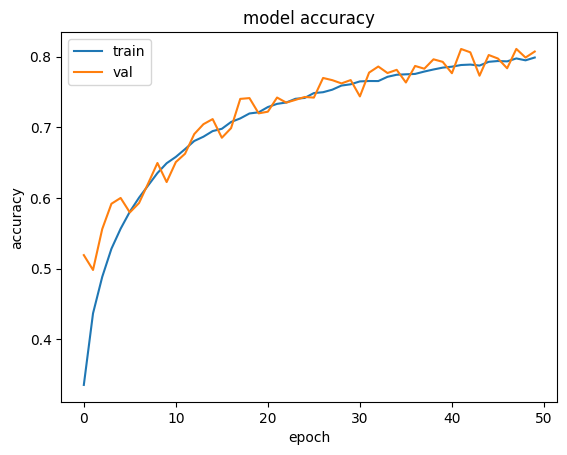

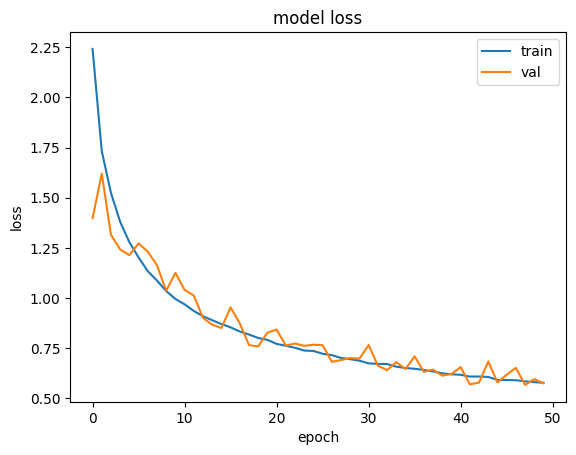

In [10]:
#  Ploting the accuracy graph
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='best')
plt.show()

# Ploting the loss graph
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='best')
plt.show()

In [25]:
from tensorflow.keras.preprocessing import image


def predict_image(image_path, model):
  img = image.load_img(image_path, target_size=(32, 32))
  img_array = image.img_to_array(img)
  img_array = np.expand_dims(img_array, axis=0)
  img_array /= 255.0  # Normalize the image

  prediction = model.predict(img_array)
  class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
  predicted_class = np.argmax(prediction)
  print(f"Predicted class: {class_names[predicted_class]}")
  return class_names[predicted_class]

# Replace 'path/to/your/image.jpg' with the actual path to your image
predicted_class = predict_image('imgfrog5.jpg', model)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
Predicted class: frog
